In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [29]:
def Age_Derived(age):
    if age < 18:
        return 0
    elif age >= 18 and age <= 24:
        return 1
    elif age >= 25 and age <= 34:
        return 2
    elif age >= 35 and age <= 44:
        return 3
    elif age >= 45 and age <= 54:
        return 4
    elif age >= 55 and age <= 64:
        return 5
    elif age >= 65:
        return 6

In [30]:
def Creatinine_Phosphokinase_Derived(creatinine_phosphokinase):
    if creatinine_phosphokinase < 10:
        return 0
    elif creatinine_phosphokinase >= 10 and creatinine_phosphokinase <= 120:
        return 1
    elif creatinine_phosphokinase >= 120:
        return 2

In [31]:
def Ejection_fraction_Derived(ejection_fraction):
    if ejection_fraction < 50:
        return 0
    elif ejection_fraction >= 50 and ejection_fraction <= 70:
        return 1
    elif ejection_fraction >= 70:
        return 2

In [32]:
def platelets_Derived(platelets):
    if platelets < 150000:
        return 0
    elif platelets >= 150000 and platelets <= 450000:
        return 1
    elif platelets >= 450000:
        return 2

In [33]:
def serum_creatinine_Derived(serum_creatinine, sex):
    output = []
    for i in range(len(serum_creatinine)):
        if (serum_creatinine[i] < 0.74 and sex[i] == 1) or (serum_creatinine[i] < 0.59 and sex[i] == 0):
            output.append(0)
        elif (serum_creatinine[i] >= 0.74 and serum_creatinine[i] < 1.35 and sex[i] == 1) or (serum_creatinine[i] >= 0.59 and serum_creatinine[i] < 1.04 and sex[i] == 0):
            output.append(1)
        elif (serum_creatinine[i] >= 1.35 and sex[i] == 1) or (serum_creatinine[i] >= 1.04 and sex[i] == 0):
            output.append(2)
    return output

In [34]:
def serum_sodium_Derived(serum_sodium):
    if serum_sodium < 135:
        return 0
    elif serum_sodium >= 135 and serum_sodium <= 145:
        return 1
    elif serum_sodium >= 145:
        return 2

In [35]:
df = pd.read_csv("../final_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [36]:
df['Age_Derived'] = df['age'].apply(Age_Derived)
df['Creatinine_Phosphokinase_Derived'] = df['creatinine_phosphokinase'].apply(
    Creatinine_Phosphokinase_Derived)
df['Ejection_fraction_Derived'] = df['ejection_fraction'].apply(
    Ejection_fraction_Derived)
df['platelets_Derived'] = df['platelets'].apply(platelets_Derived)
df['serum_creatinine_Derived'] = serum_creatinine_Derived(
    list(df['serum_creatinine']), list(df['sex']))
df['serum_sodium_Derived'] = df['serum_sodium'].apply(serum_sodium_Derived)

In [37]:
# Input
x = df.drop(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
            'serum_creatinine', 'serum_sodium', 'DEATH_EVENT'], axis='columns')
# Target
y = df['DEATH_EVENT']

In [38]:
# Splitting The Dataset
xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.30, random_state=0)

In [39]:
# Scaling model in the range of -1 to 1
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

Score of the Logistic Regression Model For Training Data is:  0.8373205741626795
Score of the Logistic Regression Model is For Testing Data:  0.8333333333333334
Accuracy of the Logistic Regression Model Model is:  0.8333333333333334


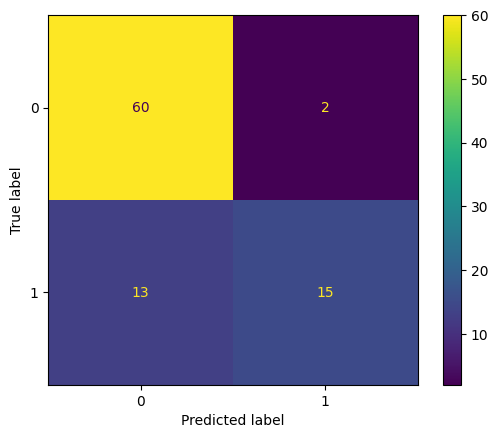

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89        62
           1       0.88      0.54      0.67        28

    accuracy                           0.83        90
   macro avg       0.85      0.75      0.78        90
weighted avg       0.84      0.83      0.82        90



In [40]:
# Logistic Regression Training Model
model = LogisticRegression(random_state=0)
model.fit(xtrain, ytrain)

# After training the model, it is time to use it to do predictions on testing data.
y_pred = model.predict(xtest)

training_score = model.score(xtrain,ytrain)
print("Score of the Logistic Regression Model For Training Data is: ",training_score)

testing_score = model.score(xtest,ytest)
print("Score of the Logistic Regression Model is For Testing Data: ",testing_score)

accuracy = accuracy_score(y_pred,ytest)
print("Accuracy of the Logistic Regression Model Model is: ",accuracy)

# Confusion Metrics for logistic regression
labels = [0,1]
cm = confusion_matrix(ytest, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

print("Logistic Regression Report:\n",classification_report(ytest, y_pred, labels=labels))

Score of the SVM For Training Data is:  0.8373205741626795
Score of the SVM is For Testing Data:  0.8444444444444444
Accuracy of the SVM Model is:  0.8444444444444444


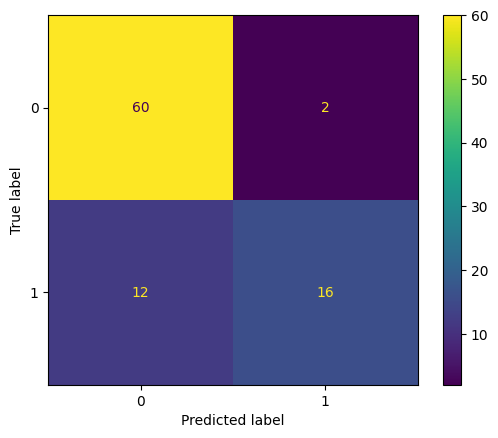

SVM Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90        62
           1       0.89      0.57      0.70        28

    accuracy                           0.84        90
   macro avg       0.86      0.77      0.80        90
weighted avg       0.85      0.84      0.83        90



In [41]:
# SVM Training Model
model1 = SVC(C=1.0,random_state=1,kernel='linear')
model1.fit(xtrain,ytrain)

# After training the model, it is time to use it to do predictions on testing data.
y_pred1 = model1.predict(xtest)

training_score1 = model1.score(xtrain,ytrain)
print("Score of the SVM For Training Data is: ",training_score1)

testing_score1 = model1.score(xtest,ytest)
print("Score of the SVM is For Testing Data: ",testing_score1)

accuracy1 = accuracy_score(y_pred1,ytest)
print("Accuracy of the SVM Model is: ",accuracy1)

# Confusion Metrics for SVM
labels = [0,1]
cm = confusion_matrix(ytest, y_pred1, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

print("SVM Report:\n",classification_report(ytest, y_pred1, labels=labels))

Score of the KNN For Training Data is:  0.8086124401913876
Score of the KNN is For Testing Data:  0.7888888888888889
Accuracy of the KNN Model is:  0.7888888888888889


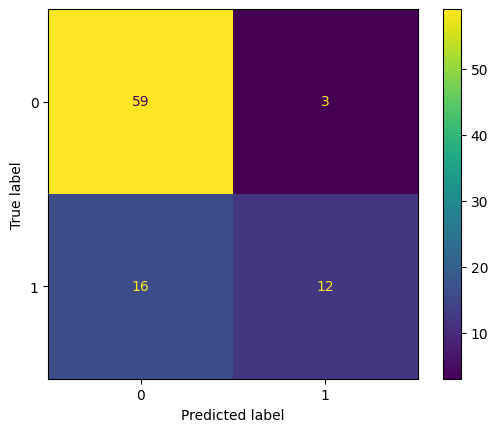

KNN Report:
               precision    recall  f1-score   support

           0       0.79      0.95      0.86        62
           1       0.80      0.43      0.56        28

    accuracy                           0.79        90
   macro avg       0.79      0.69      0.71        90
weighted avg       0.79      0.79      0.77        90



In [42]:
# KNN Training Model
model2 = KNeighborsClassifier(n_neighbors=7)
model2.fit(xtrain,ytrain)

# After training the model, it is time to use it to do predictions on testing data.
y_pred2 = model2.predict(xtest)

training_score2 = model2.score(xtrain,ytrain)
print("Score of the KNN For Training Data is: ",training_score2)

testing_score2 = model2.score(xtest,ytest)
print("Score of the KNN is For Testing Data: ",testing_score2)

accuracy2 = accuracy_score(y_pred2,ytest)
print("Accuracy of the KNN Model is: ",accuracy2)

# Confusion Metrics for SVM
labels = [0,1]
cm = confusion_matrix(ytest, y_pred2, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

print("KNN Report:\n",classification_report(ytest, y_pred2, labels=labels))